In [59]:
# import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input,Dense
from tensorflow import keras
from keras import regularizers
from keras.models import Model, load_model
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve

In [60]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/FYP_CCFraudDetection/FYP Design/Datasets/creditcard.csv')
data_kfold = data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




```
`# This is formatted as code`
```

**The datasets contains transactions made by credit cards in September 2013 by 
european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. The dataset contains data that is already normalised. The columns names are hidden under an alias that starts from V1 to V28. This is to maintain the confidentiality of the transactions performed. There are 2 columns that have not being normalised. The time column and the amount the transaction was normalised and are the only columns that contain the raw data from the transaction. The time column contains the amount between the first transaction and itself in seconds. The other column not normalised is the column called class. The Class column contains 2 values of 1 and 0 and these represent if the transaction was fraudulent or not.**

**Data Exploration**

In [61]:
data.head(30)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [62]:
data.shape

(284807, 31)

In [63]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [64]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [65]:
data.isnull().values.any()

False

**Empty list as none of the columns contain null values**

In [66]:
data.columns[data.isna().any()].tolist()

[]

In [67]:
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [68]:
 data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [69]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

**Imbalance of the dataset Exploration**

In [70]:
print('Imbalance of dataset')
print(data['Class'].value_counts() / len(data))

Imbalance of dataset
0    0.998273
1    0.001727
Name: Class, dtype: float64


In [71]:
print(pd.value_counts(data['Class']))

0    284315
1       492
Name: Class, dtype: int64


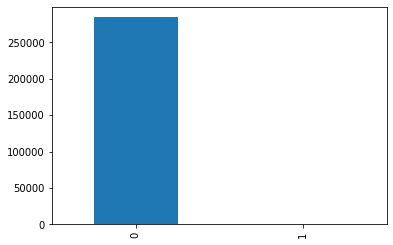

In [72]:
data['Class'].value_counts().plot.bar()

**When Originally creating a Support Vector Machine, I trained the data using 75% of all the data and testing on the remaining 25%. this yielded an accuracy of 100%. this could have been because the model was overtrained or all the predictions made were non fraud and there was no fraud transactions in the test dataset. To further investigate the result of the SVM, it will be trained on equal fraud and non fraud transactions and tested with all the data**

**Creating A balanced dataset which takes the frauduent transactions and randomised non fraudulent transactions. A new dataset is created by adding the 492 fraudulent records and randomly adding 492 non fraudulent records to the dataset**

In [73]:
newDataSet = data[data['Class'] == 1]
newDataSet2 = data[data['Class'] == 0]
newDataSet2 = newDataSet2.sample(n = 492)
data2 = pd.concat([newDataSet2, newDataSet])
print(len(data2))

984


**Removing the column class which indictates that the transaction is fraudulent or not, the class column is assigned to act as the target vales dataset**

In [74]:
X = np.array(data2.loc[:, data2.columns != 'Class'])
y = np.array(data2.loc[:, data2.columns == 'Class']).reshape(-1, 1)

In [75]:
print(len(X))
print(len(y))

984
984


**the model is trained on a 75% of the data and verified using the other the 25% of the data**

In [76]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2, shuffle = True, stratify = y)

In [77]:
from sklearn.metrics import accuracy_score
from sklearn import svm
clf = svm.SVC(kernel='linear',C=1,random_state=0)

In [78]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

738
246
738
246


**A linear Support Vector Machine is used to train out model. the SVM was chosen using the cheat sheet. it is trained on the split dataset and the test dataset is used to verify the validity of the model**

In [79]:
# fit the model
clf.fit(X_train, y_train.ravel())

# prediction for Training data
train_pred = clf.predict(X_train)

# prediction for Testing data
test_pred = clf.predict(X_test)


**A correlation Matrix was used to display the result of the SVM**

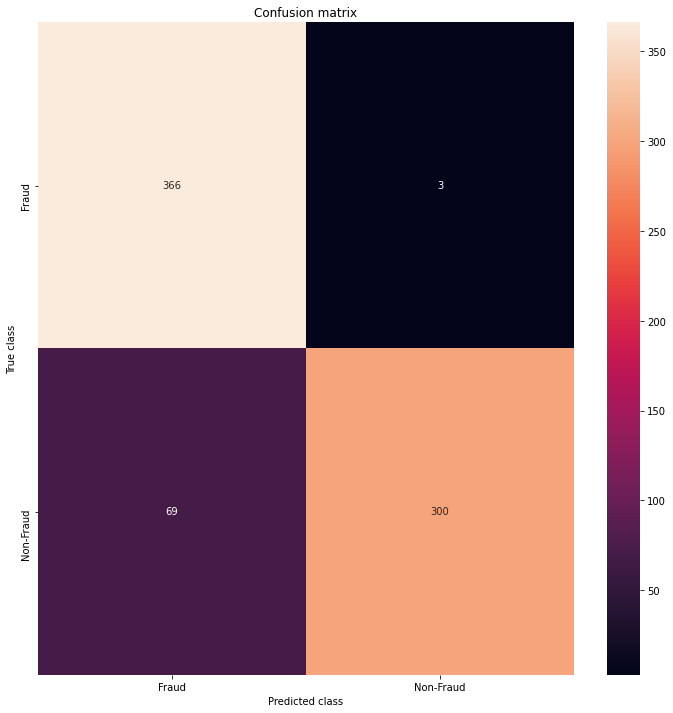

In [80]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
import seaborn as sns
LABELS = ["Fraud", "Non-Fraud"]
conf_matrix = confusion_matrix(y_train,train_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [81]:
print('Accuracy score for Training Dataset = ', accuracy_score(y_train,train_pred)*100)

Accuracy score for Training Dataset =  90.2439024390244


**ALL Data Used for Testing**

the whole dataset was used to test the model created. the model was previously trained and tested using 984 records. this time it is going to make the prediction on all 284807 which includes th records ut has already being trained and tested on.

In [82]:
X_all = np.array(data.loc[:, data.columns != 'Class'])
y_all = np.array(data.loc[:, data.columns == 'Class']).reshape(-1, 1)

print(len(X_all))
print(len(y_all))

284807
284807


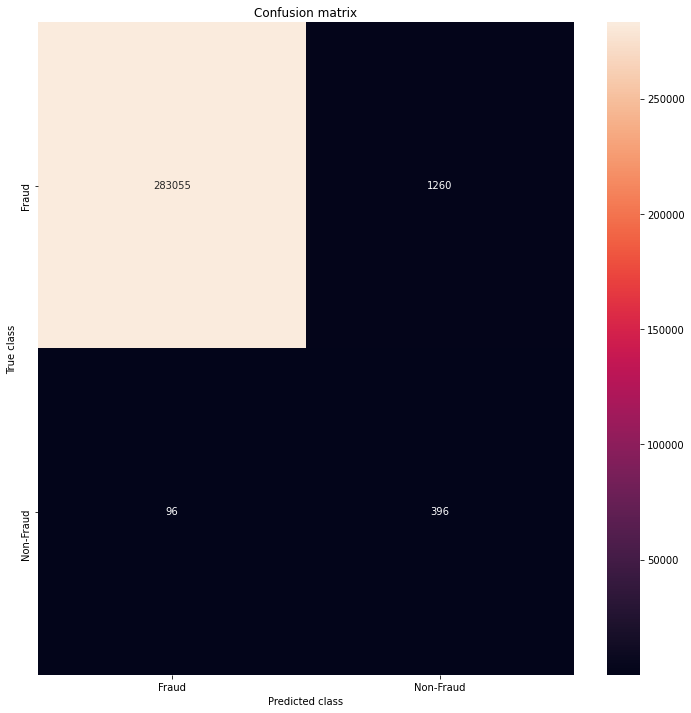

In [83]:
test_pred = clf.predict(X_all)

from sklearn.metrics import confusion_matrix, precision_recall_curve
import seaborn as sns
LABELS = ["Fraud", "Non-Fraud"]
conf_matrix = confusion_matrix(y_all,test_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [84]:
print('Accuracy score for Training Dataset = ', accuracy_score(y_all,test_pred)*100)

Accuracy score for Training Dataset =  99.52388810668276


**This time the data was tested where all the data was non fraudulent except for 42 records. the model will try and correctly identify the records into the correct category.**

In [85]:
remainingData = data
newDataSet_fraud = data[data['Class'] == 1]
newDataSet_nonFraud = data[data['Class'] == 0]
newDataSet_fraud = newDataSet_fraud.sample(n = 450)
newDataSet_nonFraud = newDataSet_nonFraud.sample(n = 213600)

dataWithMajorityFraud = pd.concat([newDataSet_fraud, newDataSet_nonFraud])
remainingData = remainingData[~remainingData.isin(dataWithMajorityFraud)].dropna()

print(len(newDataSet_nonFraud))
print(len(newDataSet_fraud))
print(len(dataWithMajorityFraud))
print(len(remainingData))

213600
450
214050
70757


In [86]:
X_someFraud_train = np.array(dataWithMajorityFraud.loc[:, dataWithMajorityFraud.columns != 'Class'])
y_someFraud_train = np.array(dataWithMajorityFraud.loc[:, dataWithMajorityFraud.columns == 'Class']).reshape(-1, 1)

X_someFraud_test = np.array(remainingData.loc[:, remainingData.columns != 'Class'])
y_someFraud_test = np.array(remainingData.loc[:, remainingData.columns == 'Class']).reshape(-1, 1)

In [87]:
#clf.fit(X_someFraud_train, y_someFraud_train.ravel())

# prediction for Testing data
test_pred = clf.predict(X_someFraud_test)

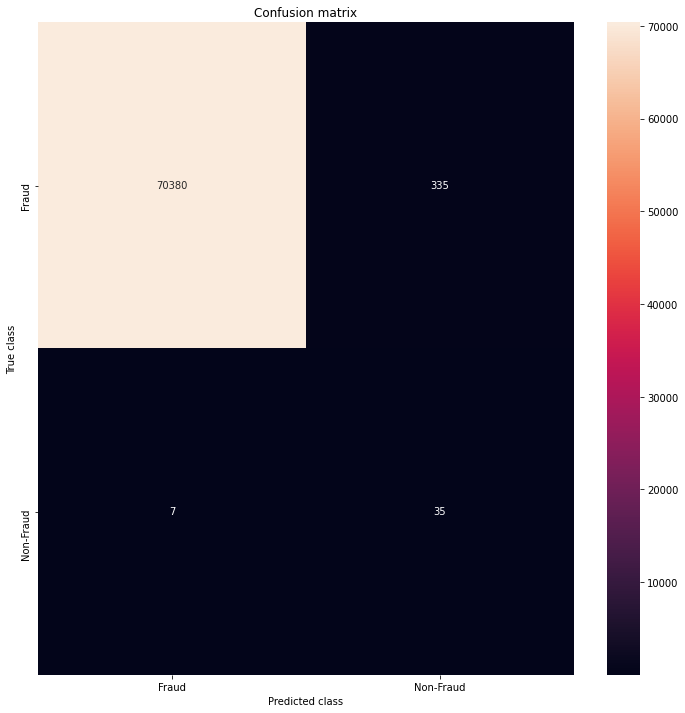

In [88]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
import seaborn as sns
LABELS = ["Non-Fraud", "Fraud"]
conf_matrix = confusion_matrix(y_someFraud_test,test_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [89]:
print('Accuracy score for Training Dataset = ', accuracy_score(y_someFraud_test,test_pred)*100)

Accuracy score for Training Dataset =  99.51665559591277


In [90]:
AccuracyForFraud = (35/42)*100
AccuracyForFraud = "{:.2f}".format(AccuracyForFraud)
print('Accuracy score for the Fraudulent Data = ' +str(AccuracyForFraud)+' %')


Accuracy score for the Fraudulent Data = 83.33 %


**Reciprocal Data- there is a lot of data records that have a corresponding record with the same time instance. this lead to the belief that maybe the transaction from 1 account was going to another account and then although there looks like the data has no links in it, these would mean they have an existing relationship that we did not known about. to combat this I only kept a singular record that happened at a singular time value**

In [91]:
reciprocalDataRemoved = data.drop_duplicates('Time')
print(len(reciprocalDataRemoved))

124592


In [92]:
X = np.array(reciprocalDataRemoved.loc[:, reciprocalDataRemoved.columns != 'Class'])
y = np.array(reciprocalDataRemoved.loc[:, reciprocalDataRemoved.columns == 'Class']).reshape(-1, 1)

In [93]:
X_train_rdr, X_test_rdr, y_train_rdr, y_test_rdr = train_test_split(X, y, test_size = 0.25, random_state = 2, shuffle = True, stratify = y)

In [94]:
print(len(reciprocalDataRemoved))
print(len(X))
print(len(y))
print(len(X_train_rdr))
print(len(X_test_rdr))
print(len(y_train_rdr))
print(len(y_test_rdr))

124592
124592
124592
93444
31148
93444
31148


In [95]:
# fit the model
clf.fit(X_train_rdr, y_train_rdr.ravel())

# prediction for Testing data
test_pred = clf.predict(X_test_rdr)


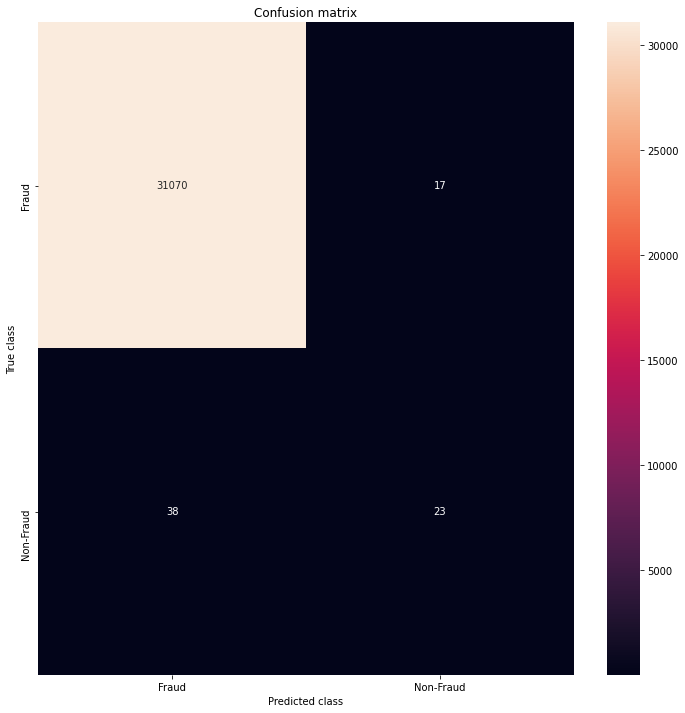

In [96]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
import seaborn as sns
LABELS = ["Fraud", "Non-Fraud"]
conf_matrix = confusion_matrix(y_test_rdr,test_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [97]:
print('Accuracy score for Training Dataset = ', accuracy_score(y_test_rdr,test_pred)*100)

Accuracy score for Training Dataset =  99.82342365480929


**KFold Section I created a KFOLD with 5 splits that randomly shuffled the data** 

In [98]:
from sklearn.model_selection import KFold

In [99]:
kfold = KFold(n_splits=5,shuffle=True,random_state=10)

In [100]:
outcomes = []
for train_index, test_index in kfold.split(X):
  Xtrain, Xtest = X[train_index], X[test_index]
  ytrain, ytest = y[train_index], y[test_index]
  clf.fit(Xtrain, ytrain.ravel())
  predictions = clf.predict(Xtest)
  accuracy = accuracy_score(ytest.ravel(), predictions)
  print(accuracy)
  outcomes.append(accuracy)
mean_outcome = np.mean(outcomes)
print("Mean Accuracy: {0}".format(mean_outcome)) 

0.998194149042899
0.998635579276857
0.9983144714664098
0.9980736816758969
0.9987157877839313
Mean Accuracy: 0.9983867338491988


**PCA - Principle Component Analysis**

In [101]:
from sklearn.decomposition import PCA

In [102]:
pca = PCA(n_components = 5)

In [103]:
from sklearn.utils import shuffle
X_train = data2
X_train = shuffle(X_train)

In [104]:
X = np.array(X_train.loc[:, X_train.columns != 'Class'])
y = np.array(X_train.loc[:, X_train.columns == 'Class']).reshape(-1, 1)

In [105]:
X_train_pca = pca.fit_transform(X)

In [106]:
print(X_train_pca)

[[ 1.71448752e+04 -9.08953350e+01 -1.07557752e+01  1.11577979e+00
  -7.16251879e-01]
 [ 5.45858926e+04  3.49008957e+01 -1.36124536e+01  1.36597424e+00
  -1.67091335e-01]
 [ 2.25658862e+04 -1.01380948e+01 -1.11571831e+01  9.80169611e-01
  -7.53682407e-01]
 ...
 [ 5.56078732e+04 -1.12673703e+02 -4.67030565e+00 -2.55025279e+00
   2.33880185e+00]
 [-5.50601254e+04 -9.65620912e+01  3.39349003e+00 -3.80305575e+00
   2.31495027e+00]
 [-5.53581113e+04  1.14950841e+01 -5.08456039e+00  1.89114951e-01
  -1.20777043e+00]]


In [107]:
print(len(X_train_pca))
print(len(y))

984
984


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_train_pca, y, test_size = 0.66, random_state = 2, shuffle = True, stratify = y)

In [109]:
# fit the model
clf.fit(X_train, y_train.ravel())

# prediction for Training data
train_pred = clf.predict(X_train)

# prediction for Testing data
test_pred = clf.predict(X_test)

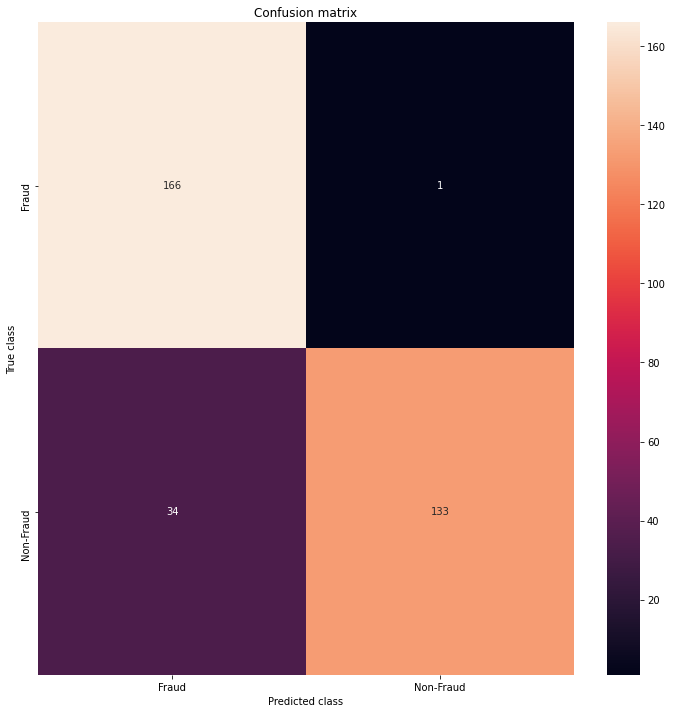

In [110]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
import seaborn as sns
LABELS = ["Fraud", "Non-Fraud"]
conf_matrix = confusion_matrix(y_train,train_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [111]:
print('Accuracy score for Training Dataset = ', accuracy_score(y_train,train_pred)*100)

Accuracy score for Training Dataset =  89.52095808383234


**Naive Bayes**

this was chosen using the ski learn cheat sheet 






In [112]:
dataNB = shuffle(data2)

In [113]:
X = np.array(dataNB.loc[:, dataNB.columns != 'Class'])
y = np.array(dataNB.loc[:, dataNB.columns == 'Class']).reshape(-1, 1)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2, shuffle = True, stratify = y)

In [115]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train.ravel())

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [116]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8739837398373984
